In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Data Science Projects/Car purchasement Classification/car_data.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
df.shape[0]

1000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [7]:
df.drop('User ID', axis = 'columns', inplace=True)
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [8]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [9]:
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [10]:
df['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

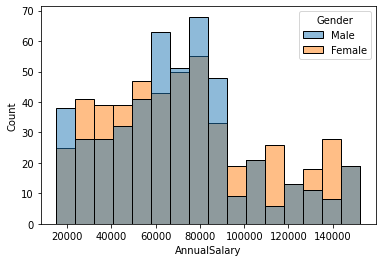

In [12]:
sns.histplot(x='AnnualSalary', data= df, hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Count'>

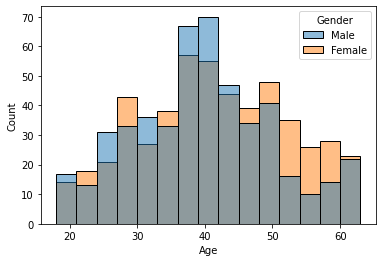

In [13]:
sns.histplot(x= 'Age', data= df, hue='Gender')

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

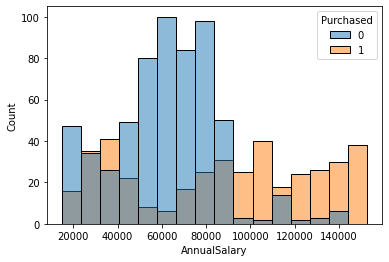

In [14]:
sns.histplot(x='AnnualSalary', data= df, hue='Purchased')

<AxesSubplot:xlabel='Age', ylabel='Count'>

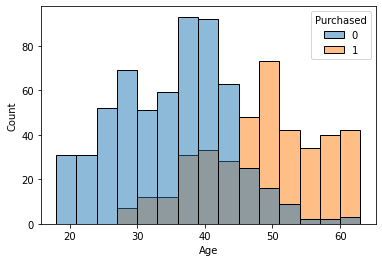

In [15]:
sns.histplot(x='Age', data= df, hue='Purchased')

In [16]:
df.corr()

,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


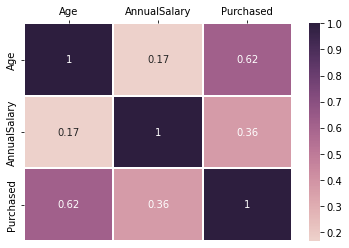

In [17]:
ax = sns.heatmap(data= df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, linewidth=0.3)
ax.xaxis.tick_top()

In [18]:
df = pd.get_dummies(df, drop_first=False)
df.head()

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,35,20000,0,0,1
1,40,43500,0,0,1
2,49,74000,0,0,1
3,40,107500,1,0,1
4,25,79000,0,0,1


In [19]:
df.drop('Gender_Male', axis=1, inplace=True)
df.head()

,Age,AnnualSalary,Purchased,Gender_Female
0,35,20000,0,0
1,40,43500,0,0
2,49,74000,0,0
3,40,107500,1,0
4,25,79000,0,0


In [20]:
X = df[['AnnualSalary','Age', 'Gender_Female']].copy()

y = df['Purchased'].copy()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
def model_accuracy(prediction):
  print('The accuracy of the model is: {}'.format(accuracy_score(y_test,prediction)))

In [25]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train.values.ravel())

log_predictions = log_model.predict(scaled_X_test)

In [26]:
model_accuracy(log_predictions)

The accuracy of the model is: 0.8366666666666667


In [27]:
from sklearn.neighbors import KNeighborsClassifier

test_errors= []
for k in range(1,30):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_X_train, y_train.values.ravel())
  knn_predict = knn_model.predict(scaled_X_test)
  test_error_rate = 1-accuracy_score(y_test, knn_predict)
  test_errors.append(test_error_rate)

In [28]:
import matplotlib.pyplot as plt

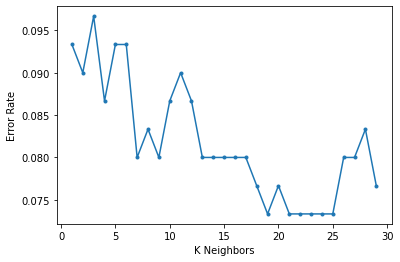

In [29]:
ax = plt.plot(range(1,30), test_errors, '.-')
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.show()

In [30]:
knn_elbow_method = KNeighborsClassifier(n_neighbors=5)
knn_elbow_method.fit(scaled_X_train, y_train.values.ravel())
knn_predict = knn_elbow_method.predict(scaled_X_test)

In [31]:
model_accuracy(knn_predict)

The accuracy of the model is: 0.9066666666666666


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()
k_values = list(range(1,40))
pipeline = Pipeline(steps = [('knn', knn)])
param_grid = {'knn__n_neighbors': k_values}
cv_classifier = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

In [33]:
cv_classifier.fit(scaled_X_train, y_train.values.ravel())
print('The best paramaters for the model are{}'. format(cv_classifier.best_params_))

The best paramaters for the model are{'knn__n_neighbors': 7}


In [34]:
pred_gridknn = cv_classifier.predict(scaled_X_test)
model_accuracy(pred_gridknn)

The accuracy of the model is: 0.92


In [35]:
from sklearn.svm import SVC
svm = SVC()

param_grid_svr = {'C':[0.01, 0.1, 0.5, 1], 'kernel':['linear', 'rbf', 'poly']}
gridsvr = GridSearchCV(svm, param_grid_svr)
gridsvr.fit(scaled_X_train, y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [36]:
pred_svr = gridsvr.predict(scaled_X_test)
model_accuracy(pred_svr)

The accuracy of the model is: 0.92


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree_model = DecisionTreeClassifier()
tree_model.fit(scaled_X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [41]:
predict_tree = tree_model.predict(scaled_X_test)
model_accuracy(predict_tree)

The accuracy of the model is: 0.8866666666666667


In [ ]:
from seaborn.axisgrid import Grid
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [2, 4, 8, 16, 32, 64, 128, 256]
max_features = [2,3,4,5,6,7]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfr = {'n_estimators':n_estimators, 'max_features':max_features, 'bootstrap':bootstrap, 'oob_score':oob_score}

gridrfr = GridSearchCV(rfr_model, param_grid_rfr)
gridrfr.fit(scaled_X_train , y_train.values.ravel())

In [44]:
print(gridrfr.best_params_)

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32, 'oob_score': True}


In [43]:
gridrfr.predict(scaled_X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [45]:
rfc = RandomForestClassifier(bootstrap= True, max_features= 2, n_estimators= 32, oob_score=True)

In [46]:
rfc.fit(scaled_X_train, y_train.values.ravel())
pred_rfc = rfc.predict(scaled_X_test)

model_accuracy(pred_rfc)

The accuracy of the model is: 0.9133333333333333
